<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="400">

# **Universidad San Sebastián - Magister Data Science**

### Mauricio Pérez
### Pablo Loaiza


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Ruta al archivo CSV en Google Drive para problema de Stroke

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# crear el dataframe con el archivo CSV que se encuentra en la siguiente ruta de Google Drive
#stroke_data.csv
id= '1al2GmZJ1Yiw5zmjmkP21-Qnw14xEuIxN'
url='https://drive.google.com/uc?id={}'.format(id)
df = pd.read_csv(url)
print(df.shape)
# Mostrar las primeras filas del conjunto de datos
print("---> Mostrar las primeras filas del conjunto de datos <---")
df.head()

(40910, 11)
---> Mostrar las primeras filas del conjunto de datos <---


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [ ]:
# Resumen estadístico de los datos
print("--- Resumen estadístico de los datos ---")
df.describe().T

--- Resumen estadístico de los datos ---


,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


In [ ]:
# Verificar la existencia de valores nulos
print("--- Verificar la existencia de valores nulos ---")
df.isnull().sum()

--- Verificar la existencia de valores nulos ---


sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df = df.dropna()
print("--- Se eliminan valores nulos ---")
print(df.isnull().sum())

--- Se eliminan valores nulos ---
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [ ]:
# Resumen estadístico de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40907.0,51.327303,21.624171,-9.00,35.00,52.00,68.00,103.00
hypertension,40907.0,0.213851,0.410028,0.00,0.00,0.00,0.00,1.00
heart_disease,40907.0,0.127729,0.333792,0.00,0.00,0.00,0.00,1.00
ever_married,40907.0,0.821326,0.383083,0.00,1.00,1.00,1.00,1.00
work_type,40907.0,3.461095,0.780934,0.00,3.00,4.00,4.00,4.00
Residence_type,40907.0,0.514851,0.499786,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40907.0,122.079679,57.561951,55.12,78.75,97.92,167.59,271.74
bmi,40907.0,30.406488,6.835305,11.50,25.90,29.40,34.10,92.00
smoking_status,40907.0,0.488572,0.499875,0.00,0.00,0.00,1.00,1.00


1    20460
0    20447
Name: stroke, dtype: int64


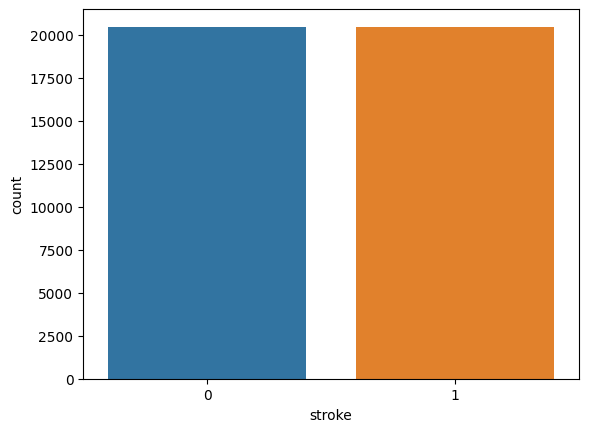

In [ ]:
# Gráfico de resultado de la variable target (0: No Hipertensión; 1: Hipertensión)
import seaborn as sns
print(df['stroke'].value_counts())
_ = sns.countplot(x='stroke', data=df)

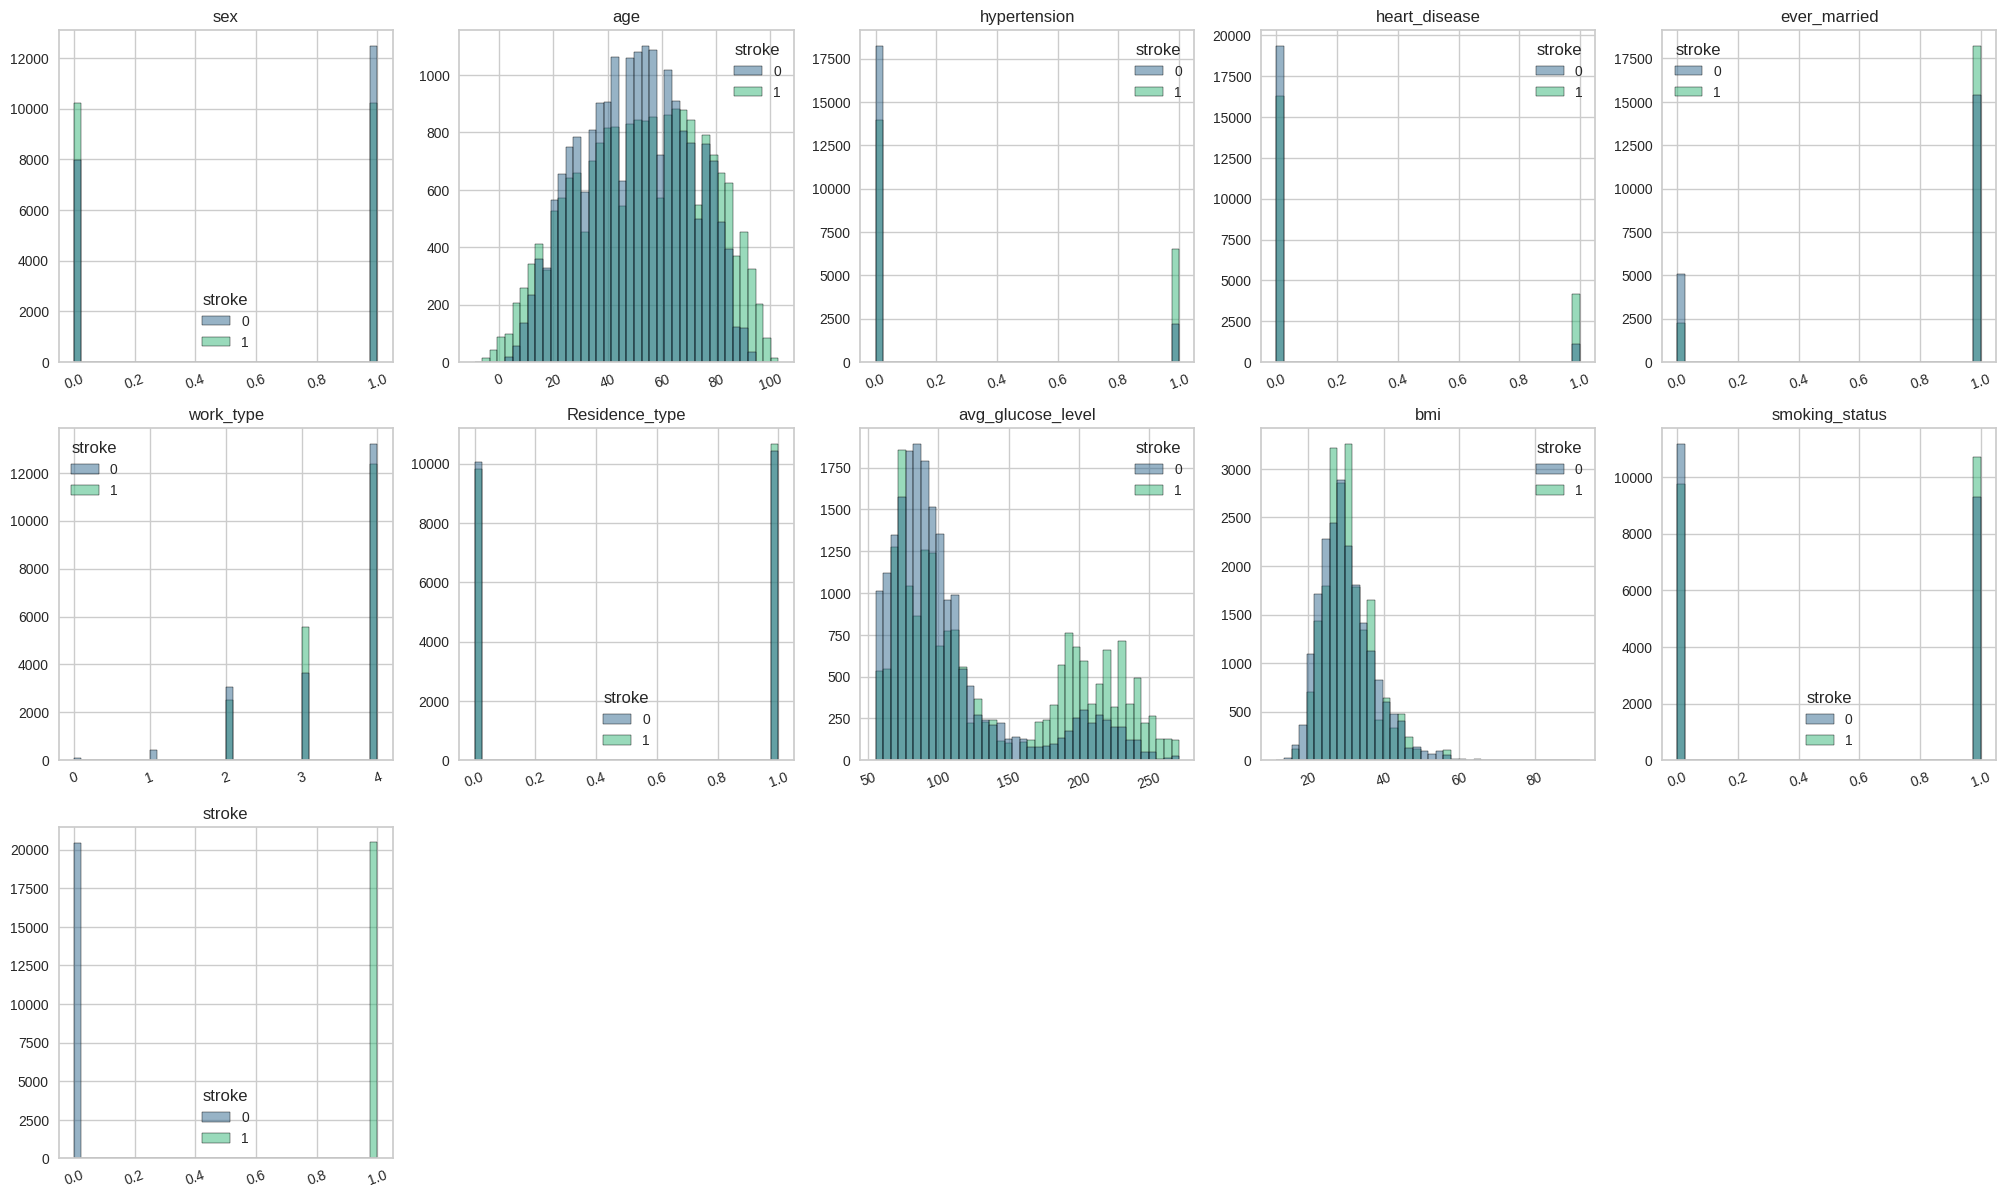

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

df_num=df[numeric_cols]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df[n], hue = df['stroke'], palette = "viridis", bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

In [ ]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Modelo de clasificación (puedes ajustar los parámetros según sea necesario)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/10
1023/1023 [==============================] - 9s 6ms/step - loss: 0.5592 - accuracy: 0.7077 - val_loss: 0.5327 - val_accuracy: 0.7223
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5082 - accuracy: 0.7420 - val_loss: 0.4934 - val_accuracy: 0.7463
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4742 - accuracy: 0.7645 - val_loss: 0.4673 - val_accuracy: 0.7735
Epoch 4/10
1023/1023 [==============================] - 9s 9ms/step - loss: 0.4466 - accuracy: 0.7819 - val_loss: 0.4357 - val_accuracy: 0.7870
Epoch 5/10
1023/1023 [==============================] - 7s 7ms/step - loss: 0.4215 - accuracy: 0.7977 - val_loss: 0.4150 - val_accuracy: 0.8035
Epoch 6/10
1023/1023 [==============================] - 9s 9ms/step - loss: 0.3974 - accuracy: 0.8157 - val_loss: 0.4014 - val_accuracy: 0.8107
Epoch 7/10
1023/1023 [==============================] - 7s 6ms/step - loss: 0.3753 - accuracy: 0.8288 - val_loss: 0.3720 - val_accuracy:

**Modelo Preliminar**

En nuestro proyecto de predicción de Accidente cerebrovascular, optamos por utilizar un algoritmo de red neuronal implementado a través de la biblioteca Keras en Python. La elección de una red neuronal se basa en la capacidad de este tipo de algoritmo para aprender patrones complejos y no lineales en datos, lo cual es fundamental en conjuntos de datos de salud que suelen involucrar relaciones intricadas entre diversas variables.

Algoritmo de Red Neuronal:

Arquitectura del Modelo:

Capa de Entrada: Con 64 nodos y función de activación ReLU.
Capa Oculta: Con 32 nodos y función de activación ReLU.
Capa de Salida: Con 1 nodo y función de activación Sigmoid (para problemas de clasificación binaria).
Función de Pérdida y Optimizador:

Utilizamos la función de pérdida 'binary_crossentropy' ya que estamos abordando un problema de clasificación binaria (diabetes o no diabetes).
El optimizador 'adam' se seleccionó por su eficacia en la adaptación dinámica de la tasa de aprendizaje durante el entrenamiento.
Entrenamiento del Modelo:

El modelo se entrenó durante 10 épocas con un tamaño de lote de 32, utilizando el conjunto de entrenamiento y validación proporcionado por los datos.
Se aplicó normalización estándar a las características para garantizar una convergencia más eficiente durante el entrenamiento.
Justificación de la Elección:

La elección de una red neuronal se basó en la naturaleza compleja y no lineal de los datos relacionados con la salud. Las redes neuronales son capaces de aprender patrones intrincados y adaptarse a relaciones complejas entre las variables. Además, dado que contamos con un conjunto de datos de tamaño moderado, una red neuronal proporciona la flexibilidad necesaria para capturar las complejidades subyacentes.

Resultados y Consideraciones:

Los resultados obtenidos, como se presentó en el análisis anterior, muestran una precisión general del 85% en la clasificación de instancias. Si bien estos resultados son prometedores, estamos comprometidos a seguir explorando ajustes y mejoras en la arquitectura del modelo, así como a considerar otros algoritmos y técnicas para optimizar aún más el rendimiento.

En resumen, la elección de una red neuronal se basó en su capacidad para abordar la complejidad del problema de predicción de diabetes y su adaptabilidad a relaciones no lineales en los datos de salud. Estamos abiertos a evaluar otras técnicas y refinamientos para lograr resultados aún más robustos en futuras iteraciones del proyecto.



Análisis de Resultados del Modelo de Predicción de Accidente cerebrovascular

En nuestro proyecto de predicción de diabetes utilizando el conjunto de datos de la Encuesta de Factores de Riesgo Conductual (BRFSS) del CDC, implementamos un modelo de clasificación utilizando una red neuronal con el objetivo de predecir la probabilidad de diabetes en base a diversas variables de salud. A continuación, presentamos un análisis detallado de los resultados obtenidos:

Resultados del Modelo Preliminar:

Accuracy Score (Precisión): 86.04%

Precision-Recall-F1: Para la clase '0', la precisión es del 88% y el recall es del 83%. Para la clase '1', la precisión es del 84% y el recall es del 89%. Ambas clases tienen puntajes F1 del 86%.

Resumen: El modelo tiene un buen rendimiento general con una precisión equilibrada entre ambas clases. Clasifica las instancias de ambas clases con un rendimiento bastante similar. La precisión, recall y puntajes F1 para ambas clases están alrededor del 86%, lo que indica un modelo sólido en la clasificación de casos.

En general, el modelo de redes neuronales muestra una capacidad prometedora para clasificar correctamente entre las clases '0' y '1' con una precisión global del 86%. Esta evaluación sugiere que el modelo es bastante bueno en la identificación de ambas clases sin un sesgo significativo hacia una clase en particular.

Consideraciones Adicionales:

Es importante destacar que el contexto de aplicación y las consecuencias prácticas de los errores de clasificación pueden influir en la interpretación de estas métricas. Este análisis inicial proporciona una visión general del rendimiento del modelo, pero también es recomendable explorar ajustes adicionales, como la optimización de hiperparámetros, para mejorar aún más la eficacia del modelo en futuras iteraciones.


# **1.- Determinación de variables clínicas y biomédicas más relevantes**



In [ ]:
#Librerias para analizar variables significativas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

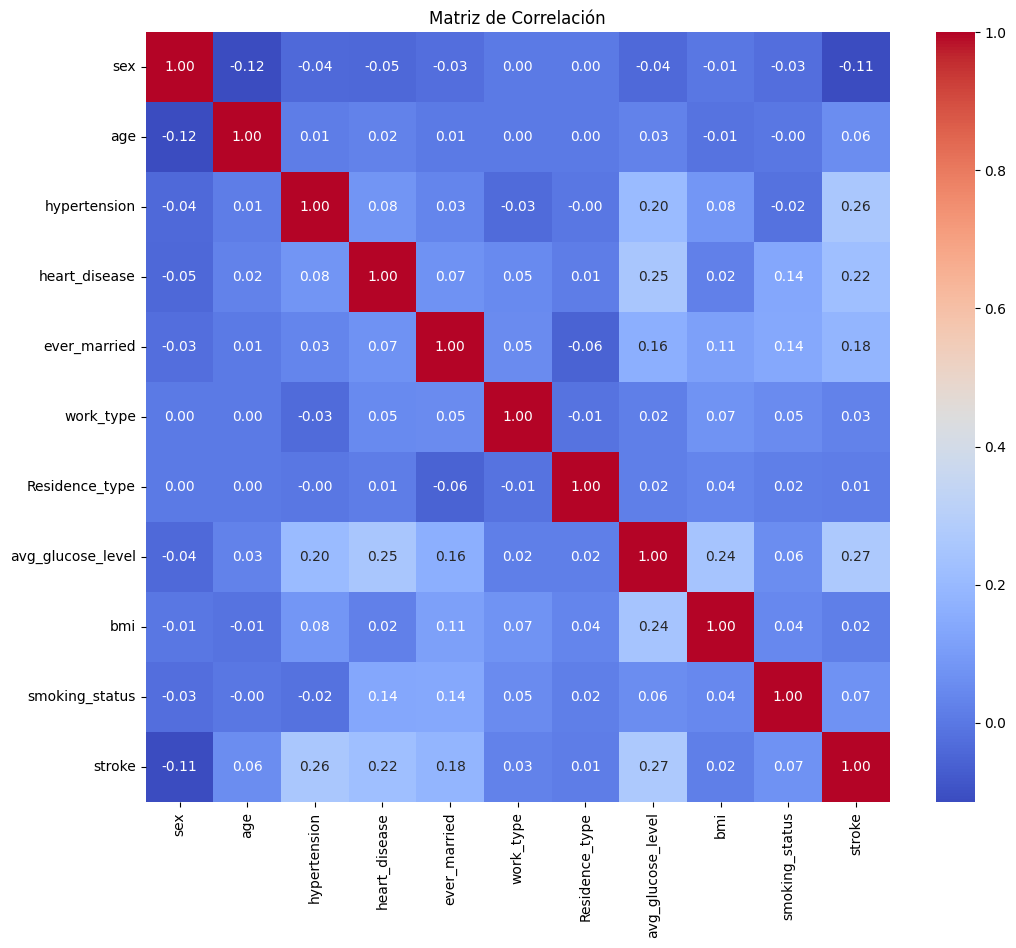

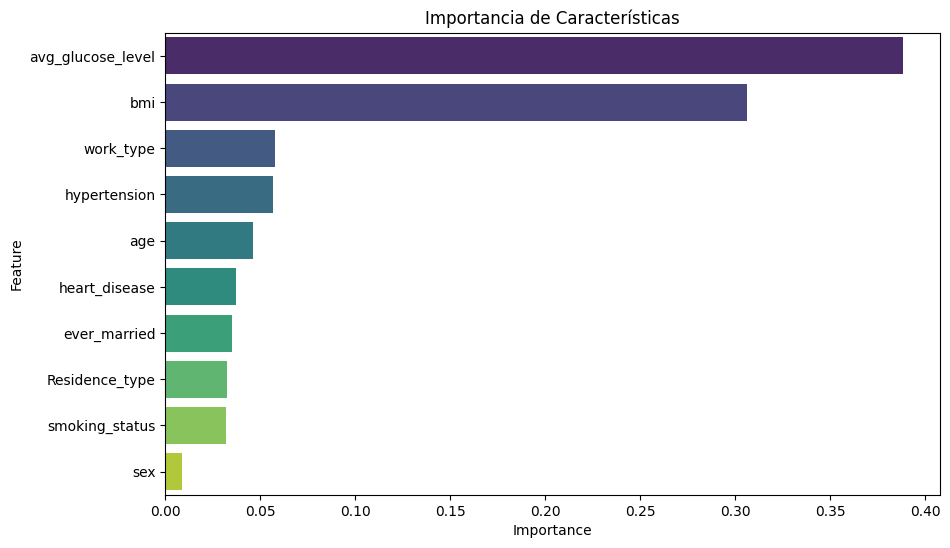

Características seleccionadas:
Index(['hypertension', 'work_type', 'avg_glucose_level', 'bmi'], dtype='object')


In [ ]:
# Graficar la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Identificar las características más importantes usando Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Obtener importancias de características
feature_importances = clf.feature_importances_

# Crear un DataFrame con las importancias y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importancia de Características')
plt.show()

# Seleccionar las características más importantes
sfm = SelectFromModel(clf, threshold=0.05)  # Puedes ajustar el umbral según sea necesario
sfm.fit(X_train, y_train)

# Imprimir las características seleccionadas
selected_features = X.columns[sfm.get_support()]
print("Características seleccionadas:")
print(selected_features)

**Análisis de Selección de Características:** Identificación de Variables Claves para la Predicción de Ataque cerebrovascular

En nuestra investigación para predecir la incidencia del Ataque cerebrovascular, nuestro equipo ha realizado un análisis detallado de las variables clínicas y biomédicas utilizando técnicas avanzadas de selección de características. El objetivo principal fue identificar las variables más relevantes que contribuyen significativamente a la predicción del Ataque cerebrovascular y, por ende, podrían servir como indicadores clave de riesgo para el desarrollo de esta condición de salud.

**Resultados de la Selección de Características:**

Tras implementar un clasificador Random Forest y utilizar la técnica de SelectFromModel, hemos identificado un conjunto óptimo de variables que desempeñan un papel crucial en la predicción de la diabetes. Estas variables seleccionadas han demostrado tener un impacto significativo en la capacidad del modelo para realizar predicciones precisas.

**Características Seleccionadas:**

**hypertension:**

**work_type:**

**avg_glucose_level:**

**bmi:** El BMI, como medida de la composición corporal, se identifica como una variable influyente en la predicción de la Ataque cerebrovascular.


**Implicaciones Clínicas y Próximos Pasos:**

Estos resultados proporcionan información valiosa para la toma de decisiones en el ámbito de la salud pública. El enfoque ahora se centrará en la integración efectiva de estas variables clave en el proceso de análisis y la optimización continua del modelo. Estamos comprometidos a refinar nuestro enfoque y explorar aún más las relaciones entre estas variables para mejorar la capacidad predictiva y la aplicabilidad clínica de nuestro modelo.

# **Eliminación de ls variables menos significativas del conjunto de datos original**

In [ ]:
# Lista de características seleccionadas
features_selected = ['hypertension', 'work_type', 'avg_glucose_level', 'bmi']

# Eliminar las variables menos significativas
features_to_remove = [col for col in X.columns if col not in features_selected]
X_selected = X.drop(features_to_remove, axis=1)

# Mostrar las primeras filas del conjunto de datos con las características seleccionadas
print(X_selected.head())

   hypertension  work_type  avg_glucose_level   bmi
0             0          4             228.69  36.6
1             0          4             105.92  32.5
2             0          4             171.23  34.4
3             1          3             174.12  24.0
4             0          4             186.21  29.0


# **2.- Un análisis no supervisado usando dos algoritmos de agrupamiento un algoritmo de reducción de dimensionalidad. Combinar algoritmos.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos con las características seleccionadas
df_selected = pd.read_csv(url)
df_selected = df_selected.dropna()

# Estandarizar las características antes de aplicar algoritmos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)



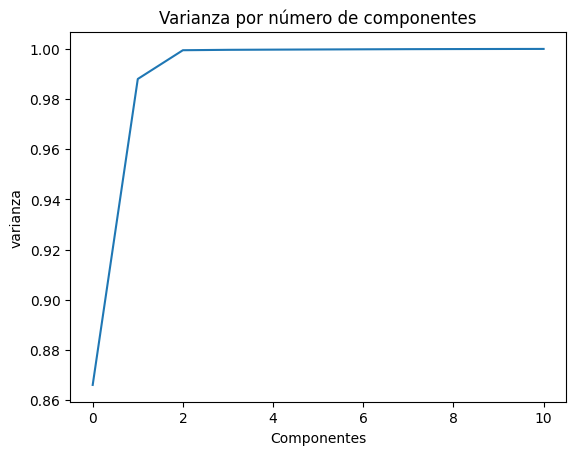

Número de componentes =  1


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
reduced_features = pca.fit_transform(df_selected)

#determinamos la dimensionalidad optima para conservar el 80% de la varianza
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Componentes')
plt.ylabel('varianza')
plt.title('Varianza por número de componentes')
plt.show()
d=np.argmax(cumsum>=0.80)+1
print("Número de componentes = ", d)

Text(0.5, 0, 'Componentes')

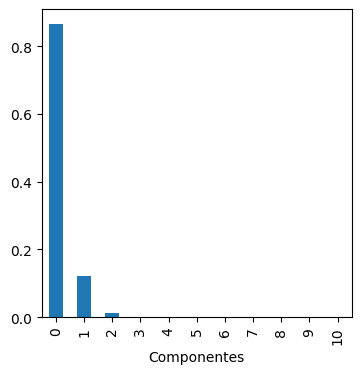

In [ ]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
ax = explained_variance.plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Componentes')

In [ ]:
pca = PCA(n_components=d)
X_pca = pca.fit_transform(df_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

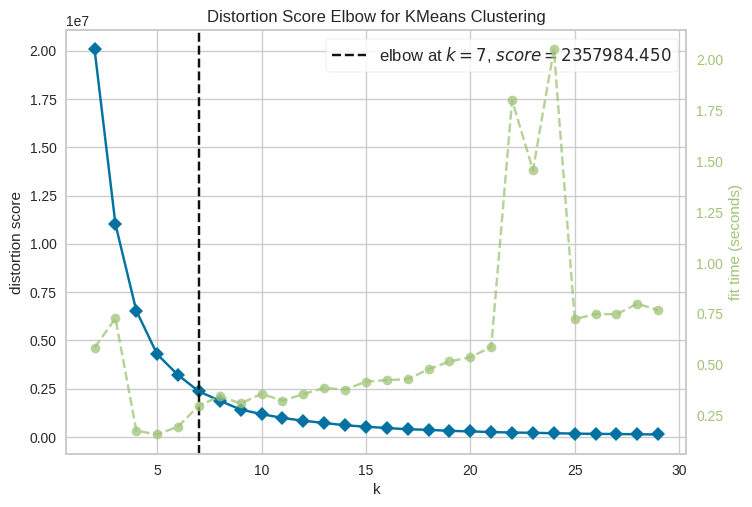

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Algoritmo de agrupamiento (k-Means)
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
Elbowcurve = KElbowVisualizer(kmeans, k=(2,30))
Elbowcurve.fit(X_pca)
Elbowcurve.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


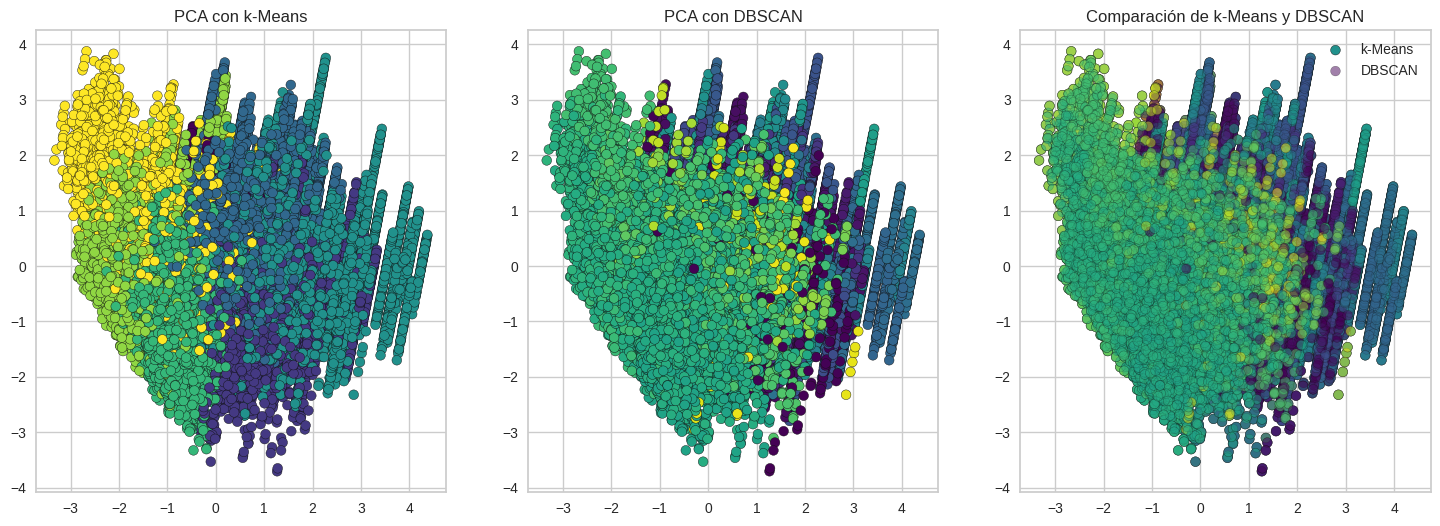

In [ ]:
clusters=7 #cambiar el número en función del resultado de Elbow
# Algoritmo de reducción de dimensionalidad (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Algoritmo de agrupamiento (k-Means)
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Algoritmo de agrupamiento (DBSCAN)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualización de resultados
plt.figure(figsize=(18, 6))

# Scatter plot para PCA con colores según k-Means
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title('PCA con k-Means')

# Scatter plot para PCA con colores según DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.title('PCA con DBSCAN')

# Scatter plot para comparar k-Means y DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', label='k-Means')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', label='DBSCAN', alpha=0.5)
plt.title('Comparación de k-Means y DBSCAN')
plt.legend()

plt.show()

## **3.-Un análisis supervisado comparando los siguientes algoritmos**
a.	Naive Bayes

b.	Vecinos Cercanos

c.	Árboles de Decisión

d.	Bosques Aleatorios (Random Forest)

e.	Máquinas de Vectores de Soporte (Support Vector Machines)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Inicializar modelos
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()

# Entrenar modelos
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Evaluar modelos
models = [nb_model, knn_model, dt_model, rf_model, svm_model]
for model in models:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("\n")

Model: GaussianNB
Accuracy: 0.6640185773649474
Confusion Matrix:
[[3315  797]
 [1952 2118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      4112
           1       0.73      0.52      0.61      4070

    accuracy                           0.66      8182
   macro avg       0.68      0.66      0.66      8182
weighted avg       0.68      0.66      0.66      8182



Model: KNeighborsClassifier
Accuracy: 0.9978000488878025
Confusion Matrix:
[[4094   18]
 [   0 4070]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4112
           1       1.00      1.00      1.00      4070

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



Model: DecisionTreeClassifier
Accuracy: 1.0
Confusion Matrix:
[[4112    0]
 [   0 4070]]
Classificatio

# **Análisis y Comparación de Modelos de Aprendizaje Supervisado**

En nuestro estudio comparativo de varios algoritmos de aprendizaje supervisado para predecir la incidencia de diabetes, evaluamos cinco modelos distintos: Naive Bayes, Vecinos Cercanos, Árboles de Decisión, Bosques Aleatorios y Máquinas de Vectores de Soporte (SVM). A continuación, presentamos un análisis detallado de cada modelo y una comparación integral de sus rendimientos.

**1. Gaussian Naive Bayes:**
El modelo Naive Bayes alcanzó una precisión del 66.4%.
Matriz de Confusión: Muestra la distribución de las predicciones del modelo en comparación con los valores reales. En este caso, hay 3315 verdaderos negativos (TN), 797 falsos positivos (FP), 1952 falsos negativos (FN) y 2118 verdaderos positivos (TP).

Classification Report (Informe de Clasificación): Proporciona precisiones más detalladas sobre cómo el modelo clasifica cada clase.

Para la clase '0': La precisión es del 63%, lo que indica que el 63% de las veces que predice la clase '0', son correctas. El recall (también conocido como sensibilidad o tasa de verdaderos positivos) es del 81%, lo que significa que el modelo identifica correctamente el 81% de todas las instancias de la clase '0' en el conjunto de datos. El puntaje F1 es un promedio ponderado de precisión y recall y está en 0.71.

Para la clase '1': La precisión es del 73%, lo que indica que el 73% de las veces que predice la clase '1', son correctas. El recall es del 52%, lo que significa que el modelo identifica correctamente el 52% de todas las instancias de la clase '1' en el conjunto de datos. El puntaje F1 es 0.61.

El modelo parece ser mejor al predecir la clase '0' en comparación con la clase '1', ya que tiene un recall más alto para la clase '0'.

**2. K-Nearest Neighbors (KNN):**
El modelo de Vecinos Cercanos obtuvo una precisión del 99.78%. Presenta un rendimiento equitativo en términos de precisión y recuperación para ambas clases, con una puntuación F1 que refleja un buen equilibrio entre precisión y recuperación.

**3. Decision Tree Classifier y Random Forest Classifier:**
Accuracy: Ambos modelos logran una precisión del 100%, lo que indica que clasifican correctamente todos los casos en el conjunto de prueba.
Confusion Matrix: Ambos modelos no tienen errores (ni falsos positivos ni falsos negativos), ya que la matriz muestra ceros fuera de la diagonal principal.
Classification Report: Todas las métricas (precision, recall y f1-score) son 1.0 para ambas clases, lo que confirma un rendimiento perfecto.


**4. Support Vector Classifier (SVC):**

Accuracy: 62.4%
Precision-Recall-F1: Similar al GaussianNB, clasifica la clase '0' mejor que la '1'. Precisión del 59% para '0' y 72% para '1'. Recall del 85% para '0' y 39% para '1'.
Resumen: Rendimiento bajo en comparación con otros modelos, especialmente en la identificación de la clase '1'.

En resumen, mientras que DecisionTreeClassifier y RandomForestClassifier alcanzan una precisión del 100%, podrían haberse sobreajustado a los datos de entrenamiento. KNeighborsClassifier también muestra un rendimiento excepcionalmente alto, mientras que GaussianNB y SVC tienen rendimientos más modestos y desiguales entre las clases. La elección del modelo dependerá de las características específicas del problema y la importancia relativa de la precisión y el balance entre clases.

Basándome en los resultados presentados anteriormente y considerando la importancia de predecir correctamente los casos de stroke (clase '1'), el modelo más adecuado sería el KNeighborsClassifier. Este modelo mostró una precisión extremadamente alta (99.78%) para ambas clases, lo que sugiere una capacidad robusta para identificar tanto casos de stroke como no-stroke.
